In [ ]:
# Import :

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.providers.aer import AerSimulator

In [2]:
circuit = QuantumCircuit(8, 1)

### Création des qubits des joueurs

Applique la porte Hadamard sur les quatre premiers qubits, qui représentent nos joueurs(Alice, Bob, Charlie, Dalia).

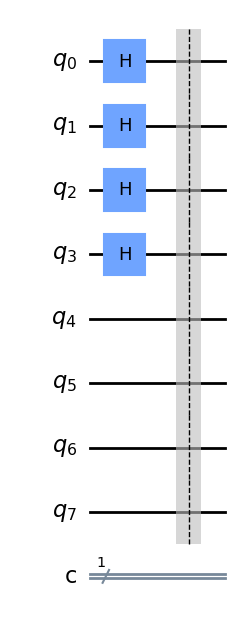

In [3]:
circuit.h(0) # Porte Hadamard sur le qubit 0
circuit.h(1) # sur le qubit 1
circuit.h(2) # sur le qubit 2
circuit.h(3) # sur le qubit 3
circuit.barrier() # barrière
circuit.draw('mpl')


### Création des qubits de raisonnement

La porte CNOT (CX) est utilisée pour comparer les couleurs des cheveux. </br>Si la couleur est la même, le qubit de raisonnement est mis à 0. Sinon il est mis à 1.

Utilisation de la porte CX pour noter ce que Alice voit :

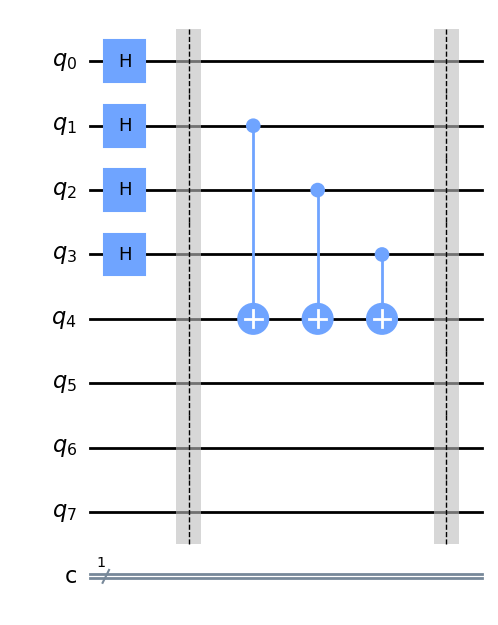

In [4]:
circuit.cx(1, 4)  # CNOT avec le qubit 1 comme contrôle et le qubit 4 comme cible
circuit.cx(2, 4)  # CNOT avec le qubit 2 comme contrôle et le qubit 4 comme cible
circuit.cx(3, 4)  # CNOT avec le qubit 3 comme contrôle et le qubit 4 comme cible
circuit.barrier() # barrière
circuit.draw('mpl')

- Utilisations les portes CX pour copier le resultat</br>
Prendre en compte le résultat d'Alice afin de répondre en conséquence.

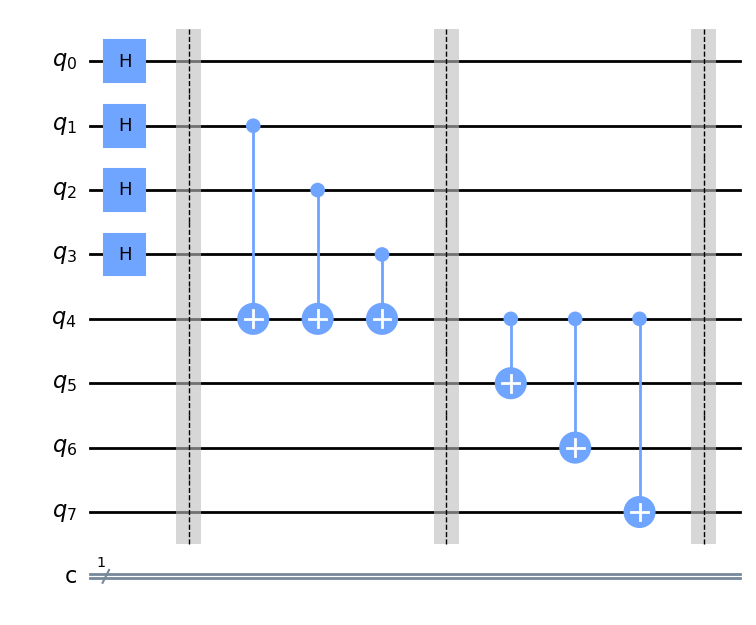

In [5]:
circuit.cx(4, 5)  # CNOT avec le qubit 4 comme contrôle et le qubit 5 comme cible
circuit.cx(4, 6)  # CNOT avec le qubit 4 comme contrôle et le qubit 6 comme cible
circuit.cx(4, 7)  # CNOT avec le qubit 4 comme contrôle et le qubit 7 comme cible
circuit.barrier() # barrière
circuit.draw('mpl')

Utilisation de la porte CX pour noter ce que Bob voit :

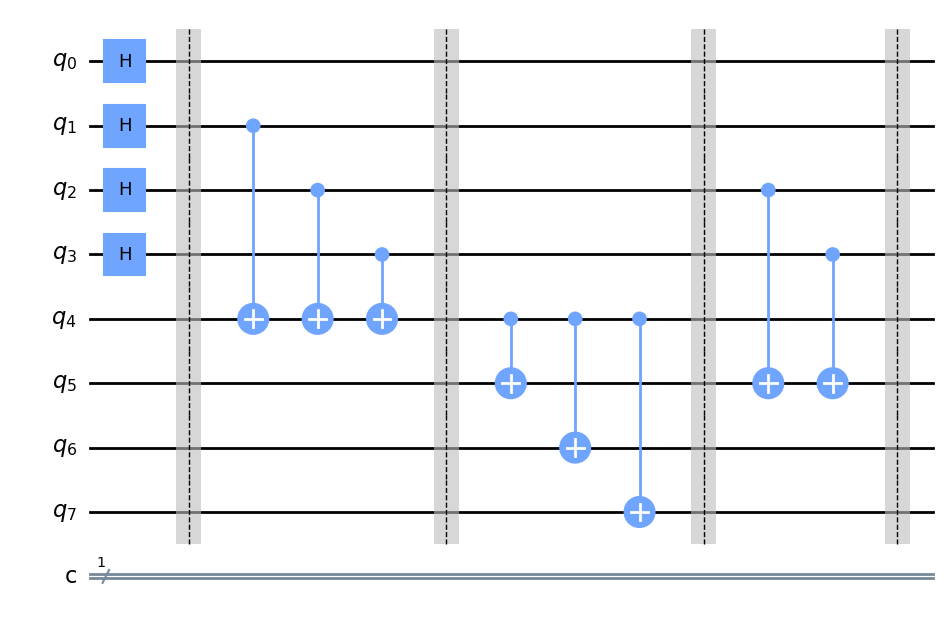

In [6]:
circuit.cx(2, 5)  # CNOT avec le qubit 2 comme contrôle et le qubit 5 comme cible
circuit.cx(3, 5)  # CNOT avec le qubit 3 comme contrôle et le qubit 5 comme cible
circuit.barrier() # barrière
circuit.draw('mpl')

- Utilisations les portes CX pour copier le resultat</br>
Prendre en compte le résultat de Bob afin de répondre en conséquence.

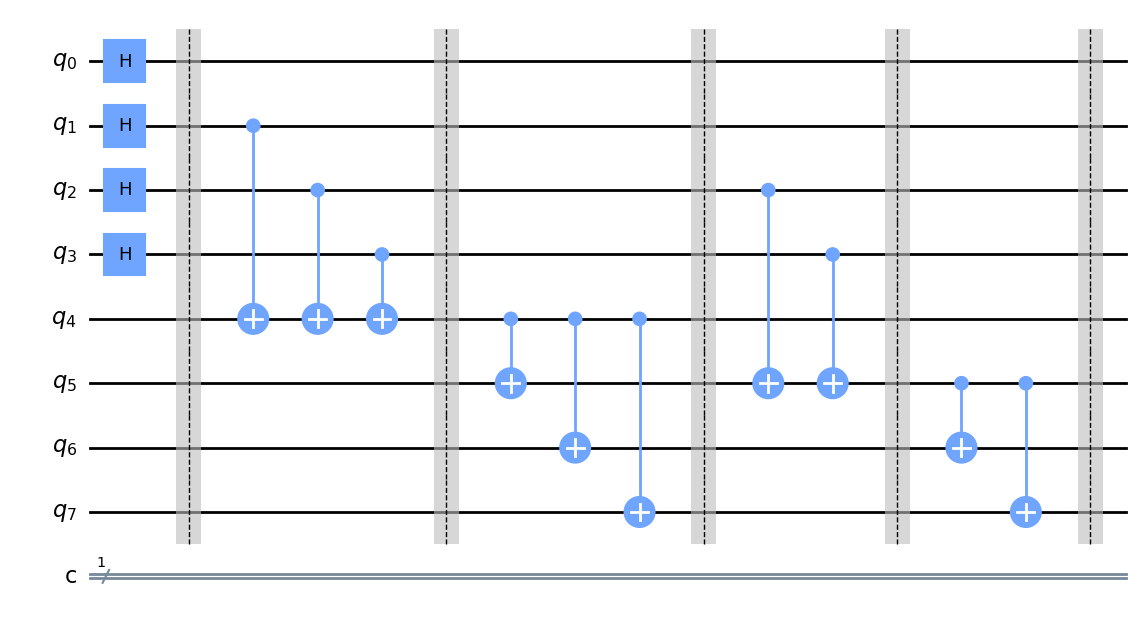

In [7]:
circuit.cx(5, 6)  # CNOT avec le qubit 5 comme contrôle et le qubit 6 comme cible
circuit.cx(5, 7)  # CNOT avec le qubit 5 comme contrôle et le qubit 7 comme cible
circuit.barrier() # barrière
circuit.draw('mpl')

Utilisation de la porte CX pour noter ce que Charlie voit :

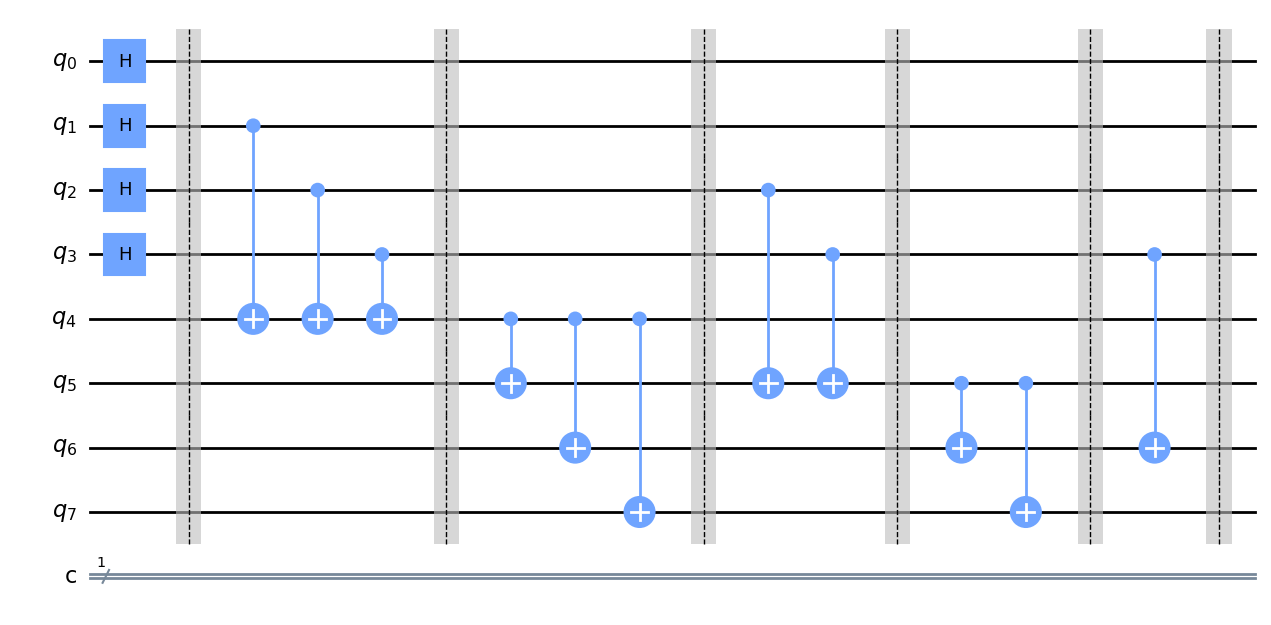

In [8]:
circuit.cx(3, 6)  # CNOT avec le qubit 0 comme contrôle et le qubit 1 comme cible
circuit.barrier() # Ajouter une barrière
circuit.draw('mpl')

- Utilisations les portes CX pour copier le resultat</br>
Prendre en compte le résultat de Charlie afin de répondre en conséquence.

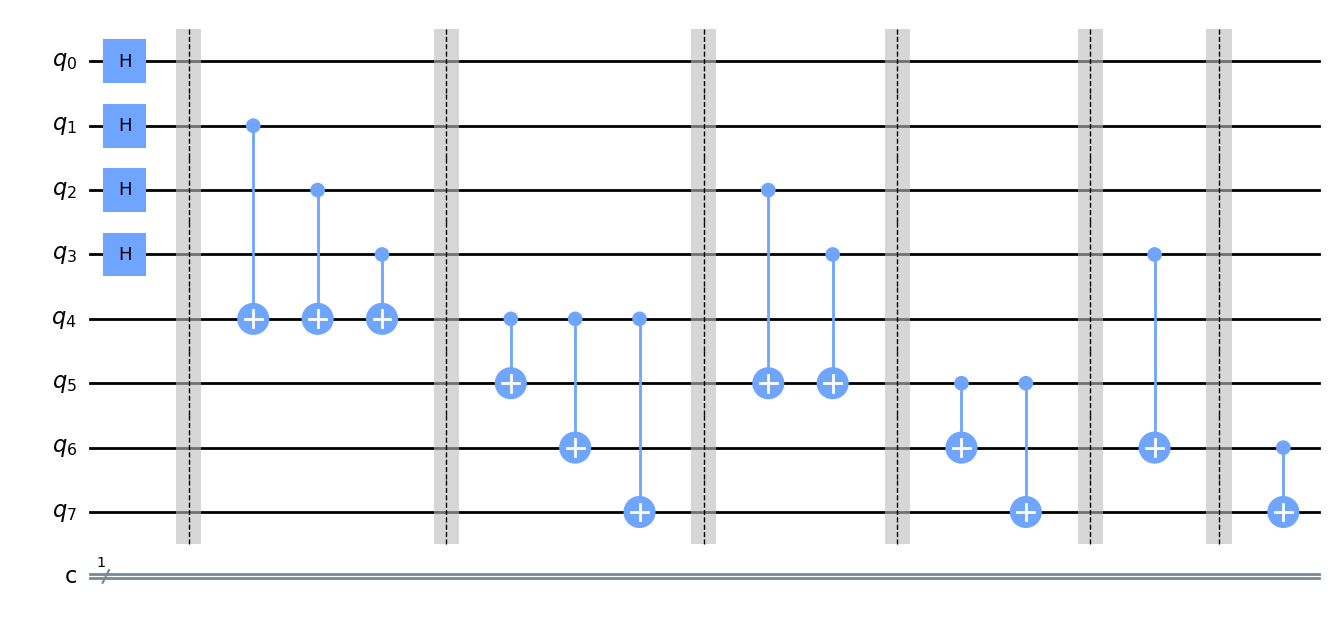

In [9]:
circuit.cx(6, 7)  # CNOT avec le qubit 0 comme contrôle et le qubit 1 comme cible
circuit.draw('mpl')

Daliah peux donc donner une réponse finale en fonction des réponses des précédents joueurs.

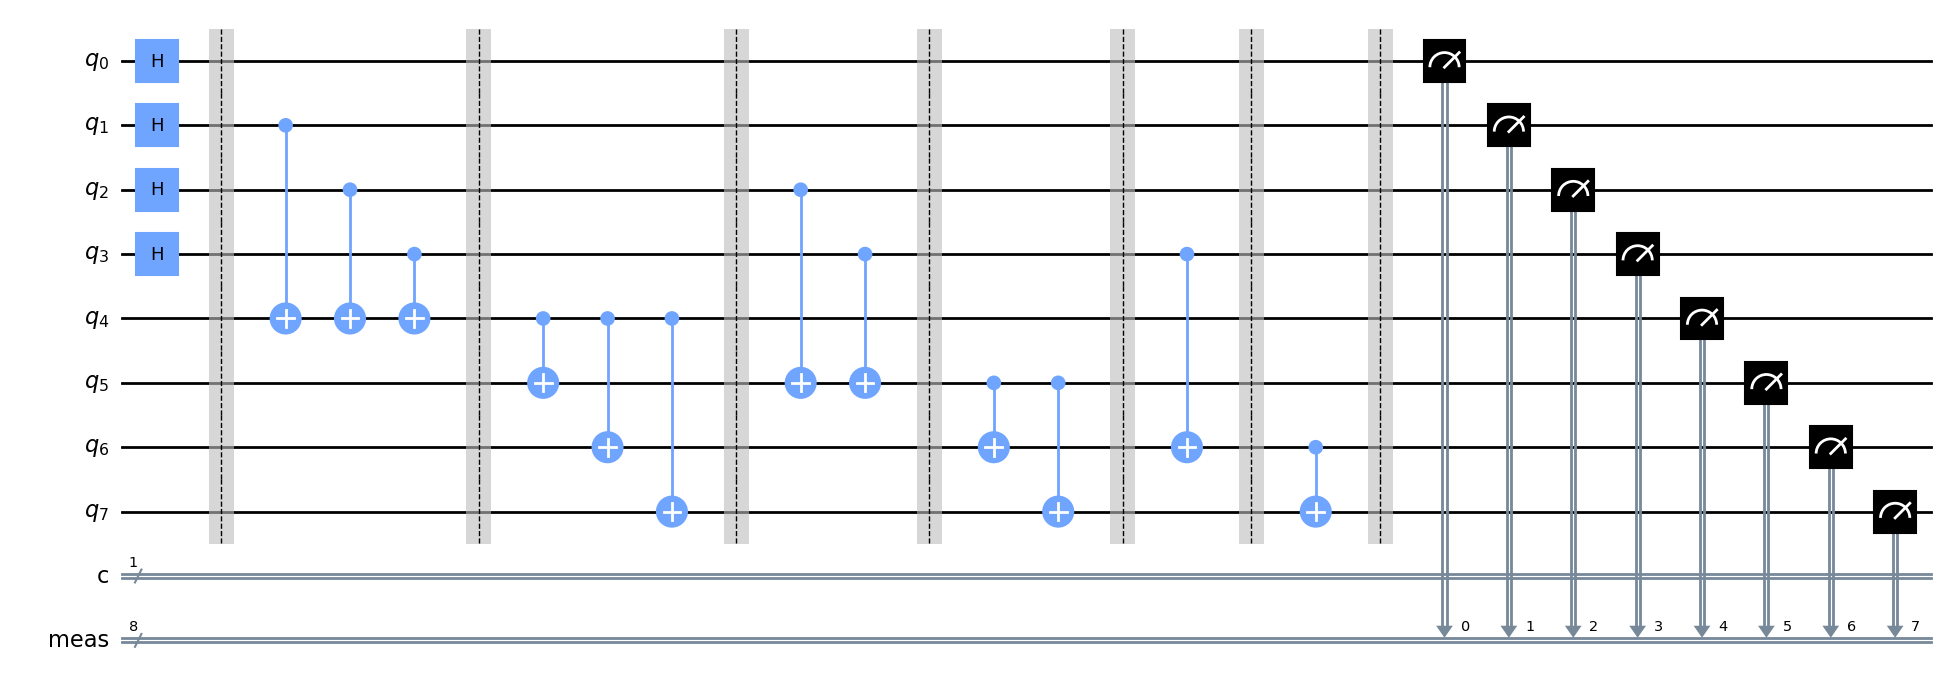

In [10]:
circuit.measure_all() 
circuit.draw('mpl', fold=-1)

# Rendu des calculs

## Simulation des Sphères de Bloch

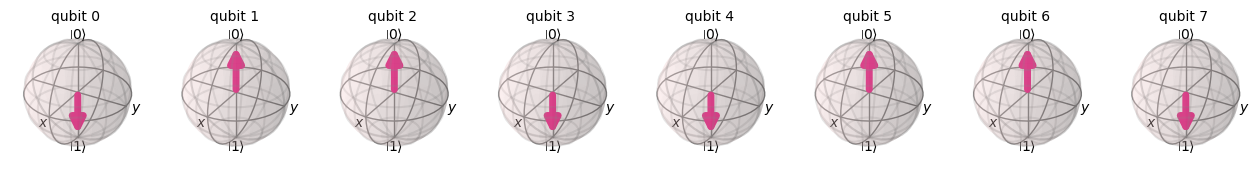

In [11]:
backend = Aer.get_backend('statevector_simulator')
result = backend.run(circuit).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

## Création des vecteurs d'états

In [12]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circuit, shots=1)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.

## Résultat de simulation sur 1000 prédictions :

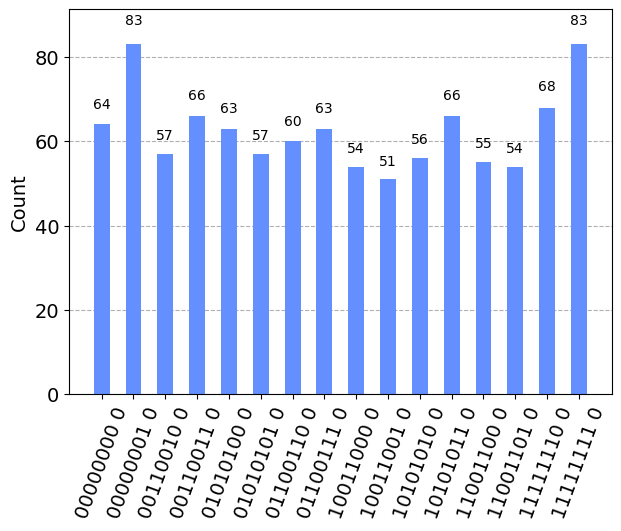

In [13]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)

### ( Pourquoi cela ne fonctionne pas ici, comparé à la première énigme? )

In [14]:
# from qiskit.visualization import plot_state_city
# outputstate = result.get_statevector(circuit, decimals=3)
# plot_state_city(outputstate)